Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Ronald Garcia"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 2 - Using Yahoo Finance `yfinance` library

In [2]:
import numpy as np  # For computations
import pandas as pd  # For indexing our data
import matplotlib.pyplot as plt  # for visualizing our data
%matplotlib inline
plt.style.use('ggplot') #available styles: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
import seaborn as sns

import yfinance as yf
from pandas_datareader import data as pdr

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

##### (2 points) Download the adjusted close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use .csv files provided. This will not affect your grade for the assignment.

In [3]:
#Getting adjusted close prices for the last 60 months
amzn = pdr.get_data_yahoo('AMZN', period = "5y")
fb = pdr.get_data_yahoo('FB', period = "5y")
mmm = pdr.get_data_yahoo('mmm', period = "5y")
ibm = pdr.get_data_yahoo('ibm', period = "5y")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-27,527.750000,544.950012,526.599976,531.409973,531.409973,7491000
2015-07-28,536.000000,536.390015,523.119995,526.030029,526.030029,5273100
2015-07-29,530.919983,532.969971,525.020020,529.000000,529.000000,3752600
2015-07-30,527.650024,539.200012,524.289978,536.760010,536.760010,3743100
2015-07-31,539.090027,542.840027,534.520020,536.150024,536.150024,3025600


In [5]:
#Ensure that the index is DateTimeIndex and is set correctly to the Date values
print("--- AMZN")
amzn.info()
print("--- FB")
fb.info()
print("--- MMM")
mmm.info()
print("--- IBM")
ibm.info()

--- AMZN
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2015-07-27 to 2020-07-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB
--- FB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2015-07-27 to 2020-07-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68

In [6]:
#There are no null values as per above
amzn.isnull().values.any() #Just double checking :-)

False

##### (3 points) Resample the data to get prices for the end of the business month. Select the Adjusted Close for each stock.

In [7]:
amzn_monthend = amzn["Adj Close"].resample('BM').last()
amzn_monthend.describe()

count      61.000000
mean     1340.864754
std       613.109286
min       511.890015
25%       769.159973
50%      1447.339966
75%      1777.439941
max      3008.909912
Name: Adj Close, dtype: float64

In [8]:
fb_monthend = fb["Adj Close"].resample('BM').last()

In [9]:
mmm_monthend = mmm["Adj Close"].resample('BM').last()

In [10]:
ibm_monthend = ibm["Adj Close"].resample('BM').last()

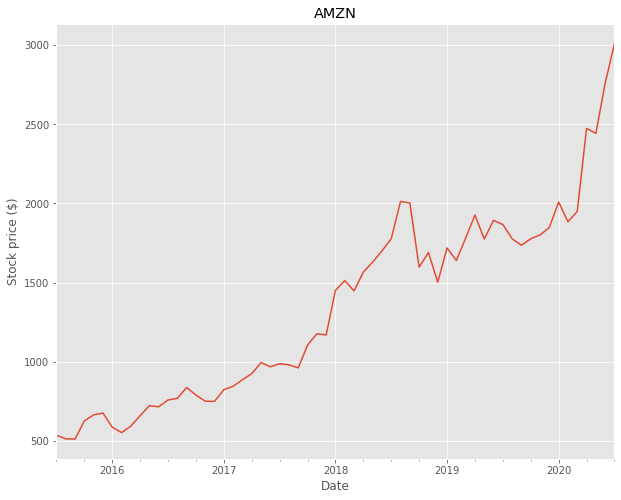

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Show AMZN stock data
ax = amzn_monthend.plot(figsize=(10,8), title="AMZN")
ax.set_ylabel("Stock price ($)")
plt.gcf().set_facecolor("w")

##### (3 points) Use the pandas autocorrelation_plot() function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks. Are they autocorrelated? Provide short explanation.

In [12]:
from pandas.plotting import autocorrelation_plot
#Note for myself: If the line is above or below the dotted line, not in between, we can say that the correlation 
#is significant, and that the adjusted close value is correlated to time

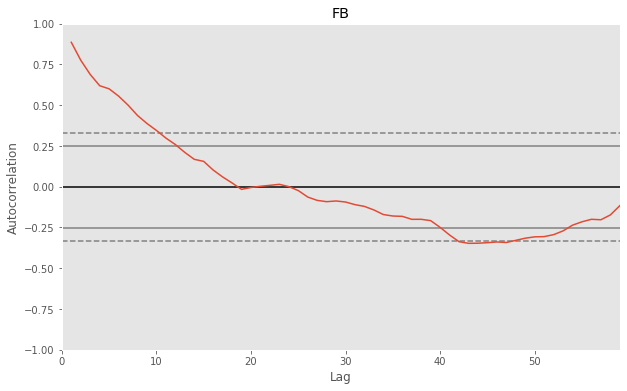

In [13]:
#FB stock autocorrelation_plot 
plt.figure(figsize=(10,6))
ax = autocorrelation_plot(fb_monthend)
ax.set_xlim(0,59);
ax.set_xlabel("Lag");
plt.title("FB");

For the FB plot, we can see that in the first year, there is a correlation between stock price and time. 
Then, from year 1 to around year 3, we cannot say that there are any significant values - no correlation 
and finally, between 3.4 and 4 year, we can barely see some significant values. 

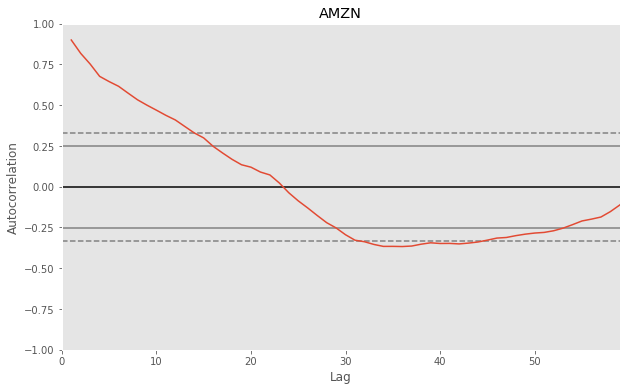

In [14]:
#AMZN stock autocorrelation_plot 
plt.figure(figsize=(10,6))
ax = autocorrelation_plot(amzn_monthend)
ax.set_xlim(0,59);
ax.set_xlabel("Lag");
plt.title("AMZN");

For the AMZN plot - We can see that in the first year (1.3), there is a correlation between stock price and time. Then, we can again see some significant values between 2.6 and 3.6 year

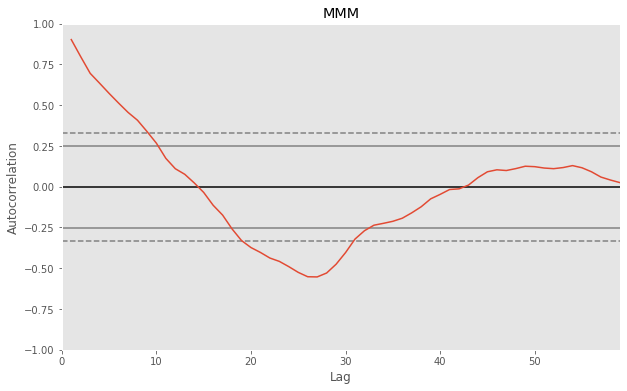

In [15]:
#MMM stock autocorrelation_plot 
plt.figure(figsize=(10,6))
ax = autocorrelation_plot(mmm_monthend)
ax.set_xlim(0,59);
ax.set_xlabel("Lag");
plt.title("MMM");

For the MMM plot - There is a correlation between stock price and time for the first year. Then, significant values between the 1.6 and 2.5 year 

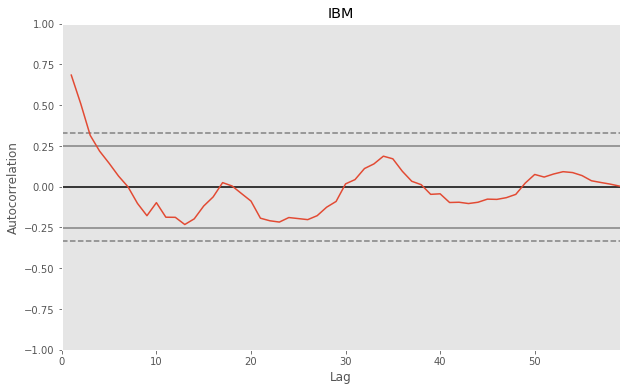

In [16]:
#IBM stock autocorrelation_plot 
plt.figure(figsize=(10,6))
ax = autocorrelation_plot(ibm_monthend)
ax.set_xlim(0,59);
ax.set_xlabel("Lag");
plt.title("IBM");

For the iBM plot - There is a correlation between stock price and time at the beginning of the first year - 3 months. Then, we cannot say that there are any significant values that show any correlation

##### (4 points) Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using shift() function.Use pandas autotocorrelation_plot() to plot the autocorrelation of the monthly returns. Are the returns autocorrelated? Provide short explanation.

In [17]:
amzn_monthly_return = amzn_monthend/amzn_monthend.shift(1)-1
amzn_monthly_return.head()

Date
2015-07-31         NaN
2015-08-31   -0.043383
2015-09-30   -0.001950
2015-10-30    0.222724
2015-11-30    0.062150
Freq: BM, Name: Adj Close, dtype: float64

In [18]:
amzn_monthly_return = amzn_monthly_return.dropna() #Dropping NaN values 

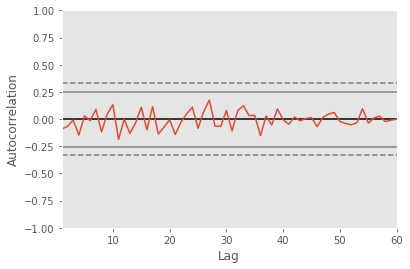

In [19]:
autocorrelation_plot(amzn_monthly_return)

As we can see in the plot, there is no significant trend seen in the month end returns and thus we can concluded that the AMZN stock price returns are not affected by the time

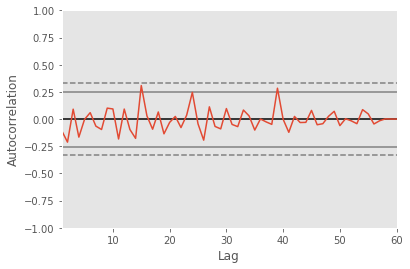

In [20]:
fb_monthly_return = fb_monthend/fb_monthend.shift(1)-1
fb_monthly_return = fb_monthly_return.dropna() 
autocorrelation_plot(fb_monthly_return)

There is no significant trend seen in the month end returns

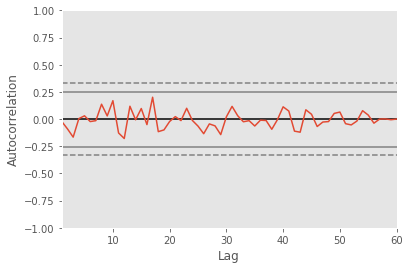

In [21]:
mmm_monthly_return = mmm_monthend/mmm_monthend.shift(1)-1
mmm_monthly_return = mmm_monthly_return.dropna() 
autocorrelation_plot(mmm_monthly_return)

There is no significant trend seen in the month end returns (all the values are in between 95% confidence interval)

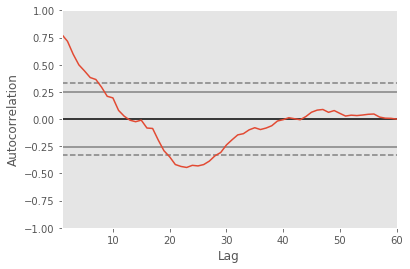

In [22]:
ibm_monthly_return = ibm_monthend/mmm_monthend.shift(1)-1
ibm_monthly_return = ibm_monthly_return.dropna() 
autocorrelation_plot(ibm_monthly_return)

There is a significant trend for almost the first year - 9 months. Then, significant values between 1.6 and 2.3 year

##### (3 points) Combine all 4 time series (returns) into a single DataFrame, Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use scatter_matrix() function from pandas.plotting). Explain the results. Is there any correlation?

In [23]:
ibm_monthly_return = pd.Series(ibm_monthly_return, name="IBM")
mmm_monthly_return = pd.Series(mmm_monthly_return, name="MMM")
fb_monthly_return = pd.Series(fb_monthly_return, name="FB")
amzn_monthly_return = pd.Series(amzn_monthly_return, name="AMZN")
df_combine_returns = pd.concat([ibm_monthly_return, mmm_monthly_return, fb_monthly_return, amzn_monthly_return], axis=1)

In [24]:
df_combine_returns.head()

,IBM,MMM,FB,AMZN
Date,,,,
2015-08-31,-0.086849,-0.054254,-0.048718,-0.043383
2015-09-30,-0.053529,-0.002603,0.005256,-0.001950
2015-10-30,-0.083068,0.108908,0.134260,0.222724
2015-11-30,-0.169298,0.002537,0.022261,0.062150
2015-12-31,-0.182098,-0.037936,0.004029,0.016682


Wall time: 2.17 s


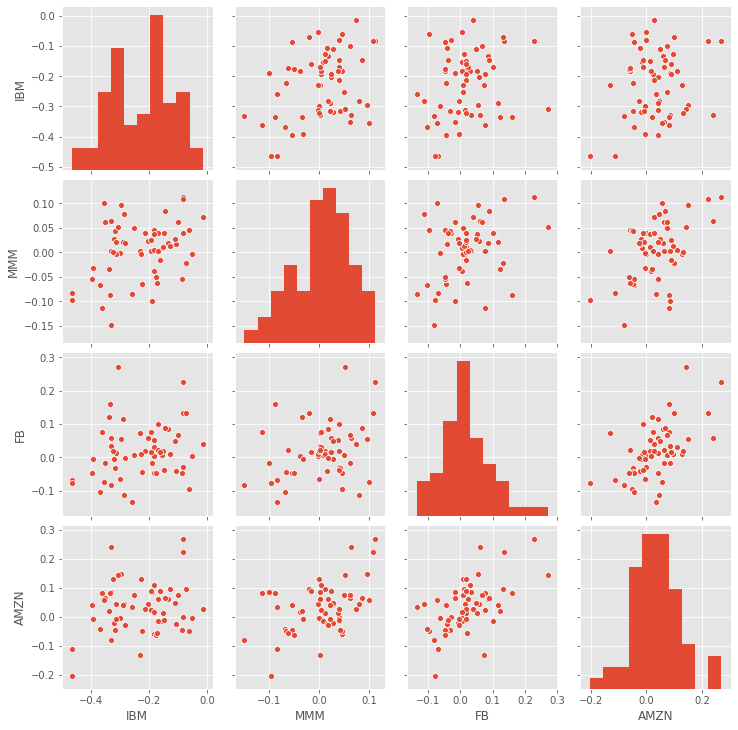

In [25]:
%%time
g = sns.pairplot(df_combine_returns.sample(60))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002489B5772C8>,
      dtype=object)

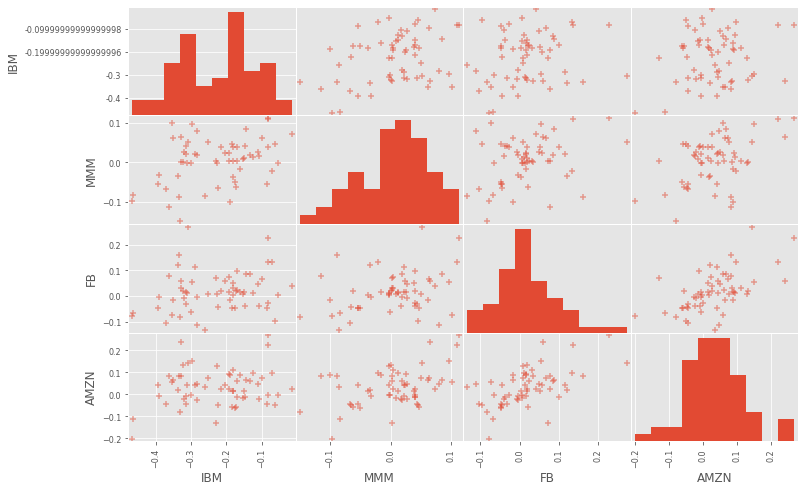

In [26]:
pd.plotting.scatter_matrix(df_combine_returns, figsize=(12,8), marker='+')

Note for myself: The closer the data points come to forming a straight line when plotted, the higher the correlation between the two variables, or the stronger the relationship.

1. There is a low positive correlation between MMM and AMZN stocks. These two tend to rise together
2. FB and AMZN also tend to rise together - low positive correlation
3. For the others stocks, there is no correlation, stocks tend to rise/drop independently